<a href="https://colab.research.google.com/github/samruddhi2904/Samruddhi-Landge/blob/main/Air%20quality%20analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = {
    'city': ['Delhi', 'Mumbai', 'Kolkata', 'Chennai', 'Bangalore', 'Hyderabad', 'Pune', 'Ahmedabad', 'Jaipur', 'Lucknow'],
    'date': pd.to_datetime(['2023-01-15'] * 10),  # Same date for all cities
    'pm25': [250, 120, 180, 90, 70, 150, 110, 160, 200, 140],
    'no2': [80, 50, 60, 40, 30, 70, 45, 65, 90, 55],
    'so2': [30, 20, 25, 15, 25, 18, 28, 35, 22, 21]
}

df = pd.DataFrame(data)
df

,city,date,pm25,no2,so2
0,Delhi,2023-01-15,250,80,30
1,Mumbai,2023-01-15,120,50,20
2,Kolkata,2023-01-15,180,60,25
3,Chennai,2023-01-15,90,40,15
4,Bangalore,2023-01-15,70,30,25
5,Hyderabad,2023-01-15,150,70,18
6,Pune,2023-01-15,110,45,28
7,Ahmedabad,2023-01-15,160,65,35
8,Jaipur,2023-01-15,200,90,22
9,Lucknow,2023-01-15,140,55,21


In [5]:
df.isnull().sum()


,0
city,0
date,0
pm25,0
no2,0
so2,0


In [7]:
df.fillna(df.select_dtypes(include=['number']).mean(), inplace=True)

In [9]:
print(df.describe())

                      date       pm25        no2        so2
count                   10   10.00000  10.000000  10.000000
mean   2023-01-15 00:00:00  147.00000  58.500000  23.900000
min    2023-01-15 00:00:00   70.00000  30.000000  15.000000
25%    2023-01-15 00:00:00  112.50000  46.250000  20.250000
50%    2023-01-15 00:00:00  145.00000  57.500000  23.500000
75%    2023-01-15 00:00:00  175.00000  68.750000  27.250000
max    2023-01-15 00:00:00  250.00000  90.000000  35.000000
std                    NaN   53.75872  18.416478   5.971227


In [10]:
print(df.dtypes)

city            object
date    datetime64[ns]
pm25             int64
no2              int64
so2              int64
dtype: object


In [14]:
df_numeric = df.select_dtypes(include=['number'])

In [15]:
correlation_matrix = df_numeric.corr()

In [16]:
print(correlation_matrix)

          pm25       no2       so2
pm25  1.000000  0.903998  0.376248
no2   0.903998  1.000000  0.200562
so2   0.376248  0.200562  1.000000


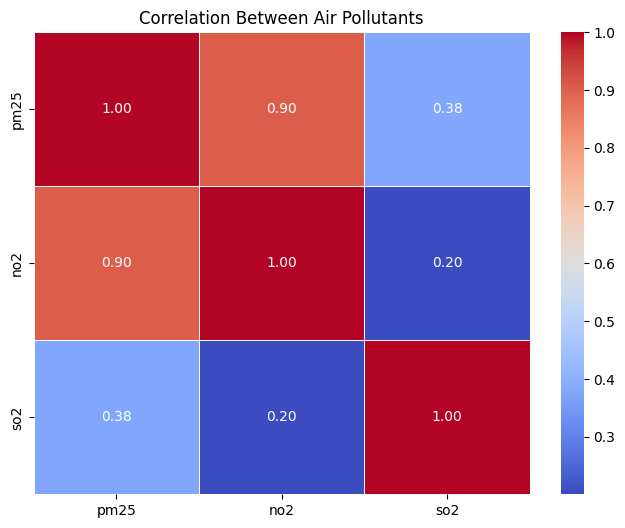

In [17]:
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Between Air Pollutants")
plt.show()

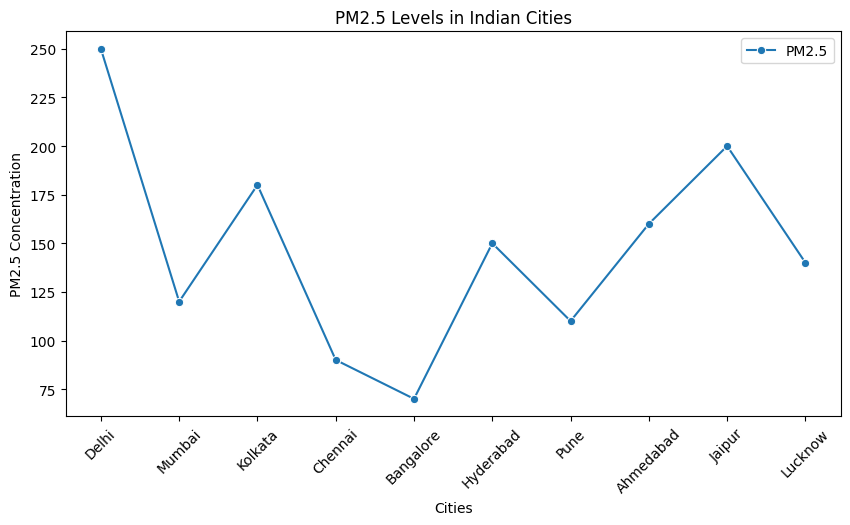

In [18]:
plt.figure(figsize=(10,5))
sns.lineplot(x='city', y='pm25', data=df, marker='o', label='PM2.5')
plt.xticks(rotation=45)
plt.title("PM2.5 Levels in Indian Cities")
plt.ylabel("PM2.5 Concentration")
plt.xlabel("Cities")
plt.legend()
plt.show()


<ipython-input-19-c61aa3a5553c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='city', y='no2', data=df, palette="viridis")


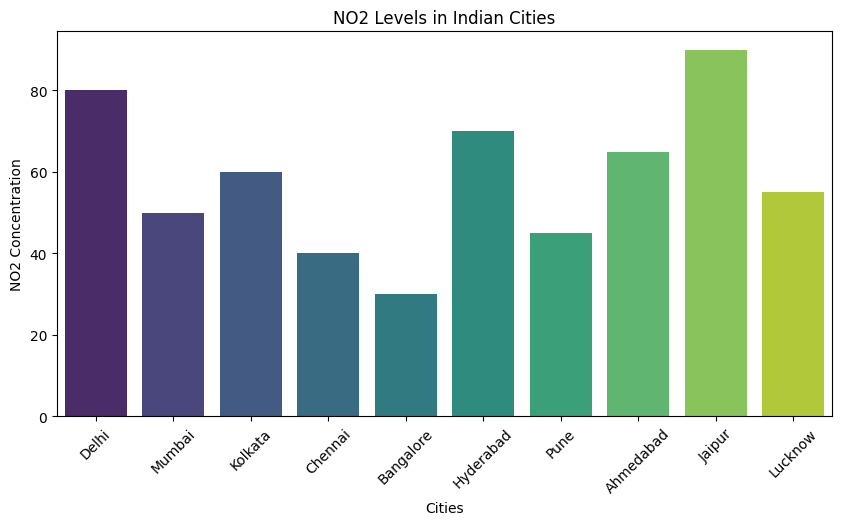

In [19]:
plt.figure(figsize=(10,5))
sns.barplot(x='city', y='no2', data=df, palette="viridis")
plt.xticks(rotation=45)
plt.title("NO2 Levels in Indian Cities")
plt.ylabel("NO2 Concentration")
plt.xlabel("Cities")
plt.show()


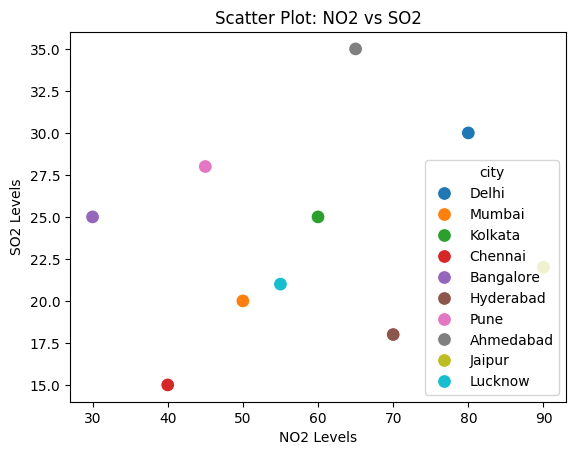

In [20]:
sns.scatterplot(x='no2', y='so2', data=df, hue='city', s=100)
plt.title("Scatter Plot: NO2 vs SO2")
plt.xlabel("NO2 Levels")
plt.ylabel("SO2 Levels")
plt.show()


In [22]:
df.to_csv('air_quality_analysis.csv', index=False)



In [23]:
from google.colab import files
files.download("air_quality_analysis.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>